# 🎯 Méthode de Monte-Carlo : Estimation de π

<div style="background-color: #e3f2fd; padding: 15px; border-radius: 10px; border-left: 5px solid #2196F3;">
    <strong>📚 Niveau :</strong> Terminale<br>
    <strong>🎯 Thème mathématique :</strong> Probabilités - Méthodes de simulation<br>
    <strong>⏱️ Durée estimée :</strong> 60-75 min
</div>

---

## 🎯 Objectifs

- ✅ Comprendre le principe de la méthode de Monte-Carlo
- ✅ Implémenter une estimation de π par simulation aléatoire
- ✅ Coder des boucles pour tirer des points aléatoires
- ✅ Observer la convergence vers la valeur théorique
- ✅ Visualiser les points aléatoires avec matplotlib

---

## 💡 Introduction : Qu'est-ce que la méthode de Monte-Carlo ?

### Principe général

La **méthode de Monte-Carlo** est une technique qui utilise le **hasard** pour résoudre des problèmes mathématiques complexes.

Au lieu de calculer directement une valeur, on effectue de **nombreuses expériences aléatoires** et on observe les résultats pour obtenir une **estimation**.

### Application : Estimer π

On va estimer la valeur de π en utilisant une approche **géométrique et probabiliste**.

**Idée :** Tirer aléatoirement des points dans un carré et compter combien tombent dans un quart de disque.

### Principe géométrique

Considérons :
- Un **carré** de côté 1 : aire = $1 \times 1 = 1$
- Un **quart de disque** de rayon 1 inscrit dans ce carré : aire = $\dfrac{\pi r^2}{4} = \dfrac{\pi \times 1^2}{4} = \dfrac{\pi}{4}$

Le quart de disque a pour équation : $x^2 + y^2 \leq 1$ (avec $x, y \in [0, 1]$)

**Rapport des aires :**

$$\dfrac{\text{Aire du quart de disque}}{\text{Aire du carré}} = \dfrac{\pi/4}{1} = \dfrac{\pi}{4}$$

### Comment ça marche ?

1. On tire **N points aléatoires** dans le carré $[0, 1] \times [0, 1]$
2. On compte combien de ces points tombent **dans le quart de disque** (condition : $x^2 + y^2 \leq 1$)
3. La **proportion** de points dans le disque approxime le **rapport des aires** = $\dfrac{\pi}{4}$

**Formule d'estimation :**

$$\pi \approx 4 \times \dfrac{\text{nombre de points dans le disque}}{\text{nombre total de points}}$$

### Exemple

Si on tire 10000 points et que 7850 tombent dans le disque :

$$\pi \approx 4 \times \dfrac{7850}{10000} = 4 \times 0{,}785 = 3{,}14$$

**Plus on tire de points, meilleure est l'estimation !**

---

### Illustration du principe

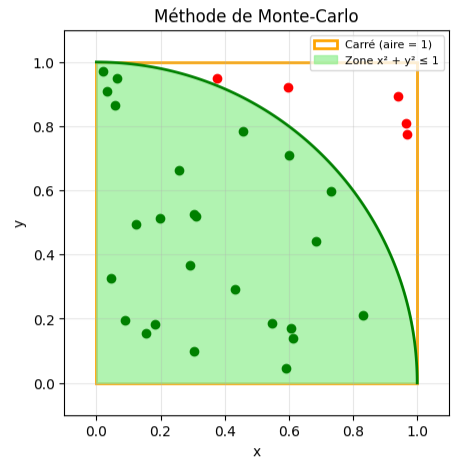

**Légende :**
- Le **carré orange** représente la zone $[0, 1] \times [0, 1]$
- Le **quart de disque vert** a pour équation $x^2 + y^2 \leq 1$
- Les **points verts** sont dans le disque, les **points rouges** sont hors du disque
- La proportion de points verts approxime $\dfrac{\pi}{4}$

## 📚 Partie 1 : Tester si un point est dans le disque

### 🤔 Questions de réflexion

**Question 1 :** Comment vérifier mathématiquement qu'un point $(x, y)$ est dans le quart de disque de rayon 1 ?

**Question 2 :** Le point $(0{,}5, 0{,}5)$ est-il dans le quart de disque ? Calculez $0{,}5^2 + 0{,}5^2$.

**Question 3 :** Le point $(0{,}9, 0{,}9)$ est-il dans le quart de disque ? Calculez $0{,}9^2 + 0{,}9^2$.

<details>
<summary>💡 Réponses</summary>

**Réponse 1 :** Un point $(x, y)$ est dans le quart de disque si et seulement si :
$$x^2 + y^2 \leq 1$$

**Réponse 2 :** $0{,}5^2 + 0{,}5^2 = 0{,}25 + 0{,}25 = 0{,}5 \leq 1$ → **OUI**, le point est dans le disque.

**Réponse 3 :** $0{,}9^2 + 0{,}9^2 = 0{,}81 + 0{,}81 = 1{,}62 > 1$ → **NON**, le point est hors du disque.
</details>

---

### ✍️ Exercice 1 : Fonction `dans_disque(x, y)`

Écrivez une fonction `dans_disque(x, y)` qui :
- Prend en paramètres les coordonnées `x` et `y` d'un point
- Renvoie `True` si le point est dans le quart de disque
- Renvoie `False` sinon

**Méthode :** Utilisez la condition mathématique $x^2 + y^2 \leq 1$

In [ ]:
def dans_disque(x, y):
    # À compléter
    pass

### ✅ Test de votre fonction

Exécutez la cellule suivante pour tester :

In [ ]:
# Tests
print("Point (0.5, 0.5) :", dans_disque(0.5, 0.5), "- Attendu : True")
print("Point (0.9, 0.9) :", dans_disque(0.9, 0.9), "- Attendu : False")
print("Point (0, 0) :", dans_disque(0, 0), "- Attendu : True")
print("Point (1, 0) :", dans_disque(1, 0), "- Attendu : True")
print("Point (0.7, 0.7) :", dans_disque(0.7, 0.7), "- Attendu : False (0.7² + 0.7² = 0.98 ≈ 1)")

<details>
<summary>💡 Correction</summary>

```python
def dans_disque(x, y):
    return x**2 + y**2 <= 1
```

**Explication :**
- On calcule $x^2 + y^2$ en Python avec `x**2 + y**2`
- On teste si cette somme est inférieure ou égale à 1 avec `<= 1`
- Cette expression booléenne renvoie directement `True` ou `False`
</details>

---

## 📚 Partie 2 : Tirer des points et compter

### ✍️ Exercice 2 : Tirer N points aléatoires

Écrivez du code qui :
1. Tire **1000 points** aléatoires dans le carré $[0, 1] \times [0, 1]$
2. Compte combien de ces points sont **dans le disque**
3. Affiche ce nombre

**Étapes à suivre :**
- Importer `random`
- Initialiser un compteur `dans_cercle = 0`
- Faire une **boucle for** de 1000 itérations
- À chaque itération :
  - Tirer `x` aléatoire avec `random.random()`
  - Tirer `y` aléatoire avec `random.random()`
  - Si `dans_disque(x, y)` est vrai, incrémenter le compteur
- Afficher le résultat

In [ ]:
import random

# À compléter


**Résultat attendu :** Un nombre autour de 785 (car $\pi/4 \approx 0{,}785$, donc environ 785 points sur 1000)

<details>
<summary>💡 Correction</summary>

```python
import random

dans_cercle = 0

for i in range(1000):
    x = random.random()
    y = random.random()
    if dans_disque(x, y):
        dans_cercle += 1

print(f"Points dans le disque : {dans_cercle} sur 1000")
```

**Explication :**
- `random.random()` génère un nombre aléatoire entre 0 et 1
- On tire 1000 points avec une boucle `for i in range(1000)`
- Pour chaque point, on teste s'il est dans le disque
- Si oui, on incrémente le compteur avec `dans_cercle += 1`
</details>

---

## 📚 Partie 3 : Estimer π

### ✍️ Exercice 3 : Fonction `estimer_pi(n)`

Écrivez une fonction `estimer_pi(n)` qui :
- Prend en paramètre le nombre de points `n` à tirer
- Tire `n` points aléatoires dans le carré
- Compte combien sont dans le disque
- Retourne l'estimation de π calculée avec la formule : $\pi \approx 4 \times \dfrac{\text{points dans disque}}{n}$

**Réutilisez** la logique de l'exercice 2 !

In [ ]:
def estimer_pi(n):
    # À compléter
    pass

### ✅ Test de votre fonction

In [ ]:
# Test simple
pi_approx = estimer_pi(1000)
print(f"Estimation avec 1000 points : π ≈ {pi_approx:.4f}")
print(f"Valeur réelle : π = 3.1416")

<details>
<summary>💡 Correction</summary>

```python
def estimer_pi(n):
    dans_cercle = 0
    
    for i in range(n):
        x = random.random()
        y = random.random()
        if dans_disque(x, y):
            dans_cercle += 1
    
    return 4 * dans_cercle / n
```

**Explication de la formule :**
- `dans_cercle / n` = proportion de points dans le disque ≈ π/4
- On multiplie par 4 pour obtenir π
- Plus `n` est grand, meilleure est l'estimation
</details>

---

## 📚 Partie 4 : Observer la convergence

### ✍️ Exercice 4 : Tester avec différentes valeurs de n

Testez votre fonction `estimer_pi(n)` avec plusieurs valeurs de `n` pour observer comment l'estimation s'améliore.

**À faire :**
1. Écrire une **boucle for** qui parcourt les valeurs `n = 100, 1000, 10000, 100000`
2. Pour chaque valeur, calculer l'estimation de π avec `estimer_pi(n)`
3. Calculer l'erreur : `abs(pi_approx - 3.141592653589793)`
4. Afficher les résultats dans un format clair

**Astuce :** Vous pouvez parcourir une liste avec `for n in [100, 1000, 10000, 100000]:`

In [ ]:
print("π réel = 3.141592653589793")
print("\nEstimations :")

# À compléter


**Observation attendue :** L'erreur diminue quand `n` augmente. Mais la convergence est **lente** !

<details>
<summary>💡 Correction</summary>

```python
print("π réel = 3.141592653589793")
print("\nEstimations :")

for n in [100, 1000, 10000, 100000]:
    pi_approx = estimer_pi(n)
    erreur = abs(pi_approx - 3.141592653589793)
    print(f"n = {n:6d} → π ≈ {pi_approx:.6f} (erreur : {erreur:.4f})")
```

**Observations :**
- Avec `n = 100` : erreur ≈ 0.1-0.2 (très imprécis)
- Avec `n = 1000` : erreur ≈ 0.05
- Avec `n = 10000` : erreur ≈ 0.01-0.02
- Avec `n = 100000` : erreur ≈ 0.005

**Pourquoi c'est lent ?** Pour diviser l'erreur par 10, il faut multiplier `n` par 100 !
</details>

---

## 📚 Partie 5 : Visualisation des points

### ✍️ Exercice 5 : Afficher les points tirés

Tracez un graphique montrant les points tirés aléatoirement :
- **Points verts** : dans le disque
- **Points rouges** : hors du disque

**Code à compléter :**
1. Écrire une boucle for pour tirer `n = 1000` points
2. Pour chaque point :
   - Si dans le disque : tracer avec `plt.plot(x, y, 'g.', markersize=3)`
   - Sinon : tracer avec `plt.plot(x, y, 'r.', markersize=3)`
3. Le code pour tracer le quart de cercle est déjà fourni

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()

n = 1000
dans_cercle = 0

# À compléter
# Pour chaque point (x, y) :
#   - Si dans_disque(x, y) : plt.plot(x, y, 'g.', markersize=3) et incrémenter dans_cercle
#   - Sinon : plt.plot(x, y, 'r.', markersize=3)


# Tracer le quart de cercle (code fourni)
theta = np.linspace(0, np.pi/2, 100)
plt.plot(np.cos(theta), np.sin(theta), 'b-', linewidth=2, label='Quart de disque')

# Affichage
pi_approx = 4 * dans_cercle / n
plt.title(f'Méthode de Monte-Carlo (n={n})\nπ ≈ {pi_approx:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

**Observation :** Les points verts remplissent le quart de disque, les rouges sont dans les coins !

<details>
<summary>💡 Correction</summary>

```python
import matplotlib.pyplot as plt
import numpy as np

plt.clf()

n = 1000
dans_cercle = 0

for i in range(n):
    x = random.random()
    y = random.random()
    
    if dans_disque(x, y):
        plt.plot(x, y, 'g.', markersize=3)
        dans_cercle += 1
    else:
        plt.plot(x, y, 'r.', markersize=3)

theta = np.linspace(0, np.pi/2, 100)
plt.plot(np.cos(theta), np.sin(theta), 'b-', linewidth=2, label='Quart de disque')

pi_approx = 4 * dans_cercle / n
plt.title(f'Méthode de Monte-Carlo (n={n})\nπ ≈ {pi_approx:.4f}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
```

**Explication :**
- On tire chaque point et on le trace immédiatement
- `'g.'` = point vert, `'r.'` = point rouge
- `markersize=3` = taille des points
- `plt.axis('equal')` = même échelle sur x et y pour voir le vrai cercle
</details>

---

## 🏆 Challenge final : Courbe de convergence

### ✍️ Exercice 6 : Tracer la convergence de π

Tracez un graphique montrant comment l'estimation de π **converge** vers la vraie valeur au fur et à mesure qu'on tire des points.

**Principe :**
- Tirer les points un par un (de 1 à `n_max`)
- Tous les 100 points, enregistrer l'estimation actuelle de π
- Tracer ces estimations en fonction du nombre de points

**Code à compléter :**
1. Créer deux listes vides : `n_values` (nombres de points) et `estimations` (valeurs de π)
2. Faire une boucle for de 1 à `n_max + 1`
3. À chaque itération :
   - Tirer un point (x, y) aléatoire
   - Si dans le disque, incrémenter `dans_cercle`
   - Si `n % 100 == 0` (tous les 100 points) :
     - Calculer l'estimation actuelle : `4 * dans_cercle / n`
     - L'ajouter à la liste `estimations`
     - Ajouter `n` à la liste `n_values`

In [ ]:
import math

plt.clf()

n_max = 10000
dans_cercle = 0
estimations = []
n_values = []

# À compléter
# À chaque itération :
#   - Tirer x et y
#   - Si dans_disque(x, y) : incrémenter dans_cercle
#   - Si n % 100 == 0 :
#       - Ajouter 4 * dans_cercle / n à estimations
#       - Ajouter n à n_values


# Tracé (code fourni)
plt.plot(n_values, estimations, 'b-', linewidth=2, label='Estimation de π')
plt.axhline(y=math.pi, color='r', linestyle='--', linewidth=2, label='π réel')
plt.xlabel('Nombre de points tirés')
plt.ylabel('Estimation de π')
plt.title('Convergence de la méthode de Monte-Carlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Afficher les résultats finaux
estimation_finale = 4 * dans_cercle / n_max
print(f"Estimation finale avec {n_max} points : {estimation_finale:.6f}")
print(f"Valeur réelle de π : {math.pi:.6f}")
print(f"Erreur : {abs(estimation_finale - math.pi):.6f}")

**Observation attendue :** La courbe bleue oscille au début puis se stabilise progressivement autour de la ligne rouge (π réel).

**Question :** Pourquoi la convergence est-elle plus lente que pour d'autres méthodes ?

<details>
<summary>💡 Correction</summary>

```python
import math

plt.clf()

n_max = 10000
dans_cercle = 0
estimations = []
n_values = []

for n in range(1, n_max + 1):
    x = random.random()
    y = random.random()
    if dans_disque(x, y):
        dans_cercle += 1
    
    if n % 100 == 0:
        estimations.append(4 * dans_cercle / n)
        n_values.append(n)

plt.plot(n_values, estimations, 'b-', linewidth=2, label='Estimation de π')
plt.axhline(y=math.pi, color='r', linestyle='--', linewidth=2, label='π réel')
plt.xlabel('Nombre de points tirés')
plt.ylabel('Estimation de π')
plt.title('Convergence de la méthode de Monte-Carlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

estimation_finale = 4 * dans_cercle / n_max
print(f"Estimation finale avec {n_max} points : {estimation_finale:.6f}")
print(f"Valeur réelle de π : {math.pi:.6f}")
print(f"Erreur : {abs(estimation_finale - math.pi):.6f}")
```

**Explication technique :**
- On tire les points **progressivement** (pas tous d'un coup)
- À chaque étape, on calcule l'estimation actuelle de π
- On enregistre seulement tous les 100 points pour ne pas surcharger le graphique
- La courbe montre bien les **fluctuations aléatoires** qui diminuent avec n

**Réponse à la question :** La méthode de Monte-Carlo converge lentement car l'erreur est proportionnelle à $\dfrac{1}{\sqrt{n}}$. Pour diviser l'erreur par 10, il faut multiplier n par 100 !
</details>

---

## 📚 Synthèse

<div style="background-color: #e8eaf6; padding: 20px; border-radius: 10px; border-left: 5px solid #3f51b5;">

### ✨ Ce que vous avez appris

#### Concepts mathématiques
- ✅ **Méthode de Monte-Carlo** : utiliser le hasard pour résoudre des problèmes complexes
- ✅ **Estimation de π** : approche géométrique basée sur le rapport aire disque/aire carré
- ✅ **Convergence probabiliste** : l'estimation s'améliore avec le nombre de tirages
- ✅ **Loi des grands nombres** : les fréquences convergent vers les probabilités
- ✅ **Vitesse de convergence** : erreur proportionnelle à $1/\sqrt{n}$

#### Compétences Python
- ✅ Écrire des **conditions mathématiques** ($x^2 + y^2 \leq 1$)
- ✅ Utiliser `random.random()` pour générer des points aléatoires
- ✅ Écrire des **boucles for** pour répéter des tirages
- ✅ **Compter** des événements dans une boucle
- ✅ Tracer des points avec **matplotlib** (`plt.plot`)
- ✅ Créer des **graphiques de convergence**
- ✅ Construire progressivement des listes de données

### 🔑 Formules à retenir

**Principe géométrique :**
$$\dfrac{\text{Aire quart de disque}}{\text{Aire carré}} = \dfrac{\pi/4}{1} = \dfrac{\pi}{4}$$

**Estimation de π :**
$$\pi \approx 4 \times \dfrac{\text{nombre de points dans le disque}}{\text{nombre total de points}}$$

**Condition géométrique :**
$$\text{Point } (x, y) \text{ dans le disque} \Leftrightarrow x^2 + y^2 \leq 1$$

### 📊 Résultats typiques

| Nombre de points | Estimation typique | Erreur typique |
|------------------|-------------------|----------------|
| 100              | ~3,0              | ±0,2           |
| 1 000            | ~3,14             | ±0,05          |
| 10 000           | ~3,141            | ±0,015         |
| 100 000          | ~3,1416           | ±0,005         |

### 🎯 Avantages et limites

**Avantages de Monte-Carlo :**
- ✅ Très simple à programmer
- ✅ Fonctionne pour des problèmes sans solution analytique
- ✅ Applicable en dimension quelconque
- ✅ Peut donner une estimation rapide

**Inconvénients :**
- ❌ Convergence **très lente** ($\propto 1/\sqrt{n}$)
- ❌ Résultat **aléatoire** (varie à chaque exécution)
- ❌ Inefficace pour calculer π avec précision (méthode d'Archimède bien meilleure)
- ❌ Demande beaucoup de calculs pour une bonne précision

### 🌍 Applications réelles

La méthode de Monte-Carlo est utilisée dans :
- **Finance** : évaluation d'options, gestion de risques
- **Physique** : simulation de particules, mécanique quantique
- **Ingénierie** : tests de résistance, fiabilité
- **Intelligence artificielle** : apprentissage par renforcement
- **Médecine** : dosimétrie en radiothérapie

</div>